<a href="https://colab.research.google.com/github/egyvedriyanto78/Deep-Learning/blob/main/YOLOv5_TACO_garbage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone YOLOv5 repository dari GitHub
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 10.71 MiB/s, done.
Resolving deltas: 100% (11694/11694), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 31.0 MB/s eta 0:00:00


In [2]:
# Instalasi package Roboflow
!pip install roboflow
from roboflow import Roboflow

# Akses API Roboflow dengan API Key
rf = Roboflow(api_key="pyJdTQUxOgmebewY8nb3")
project = rf.workspace("divya-lzcld").project("taco-mqclx")
version = project.version(3)

# Download dataset dalam format YOLOv5
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TACO-3 in yolov5pytorch:: 100%|██████████| 12020/12020 [00:01<00:00, 6420.35it/s]


In [3]:
# Cek struktur direktori dataset
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [5]:
# Menjalankan training YOLOv5
!python train.py --img 640 --batch 16 --epochs 25 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      15/24       4.4G    0.04361    0.02001    0.02677         95        640:  64% 169/263 [00:56<00:40,  2.32it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      15/24       4.4G    0.04367    0.02005    0.02678        151        640:  65% 170/263 [00:56<00:41,  2.23it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      15/24       4.4G    0.04364    0.02008    0.02677        108        640:  65% 171/263 [00:56<00:36,  2.53it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

In [7]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --source {dataset.location}/test/images

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/yolov5/TACO-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/100 /content/yolov5/TACO-3/test/images/000000_jpg.rf.1b029d4c742673020fa91367070f5f51.jpg: 640x640 1 Bottle cap, 1 Bottle, 1 Other plastic, 11.6ms
image 2/100 /content/yolov5/TACO-3/test/images/000000_jpg.rf.c74a32a1e0ac35591aa5f3279b58ee6f.jpg: 64

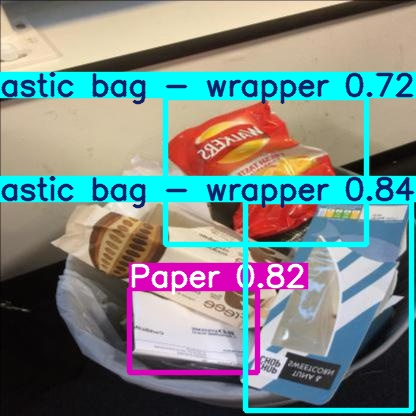

In [8]:
from IPython.display import Image, display
display(Image(filename='runs/detect/exp2/000005_JPG_jpg.rf.6eb81505cad603f0dd0e500f5f75d52e.jpg'))

In [14]:
!python val.py --weights runs/train/exp2/weights/best.pt --data {dataset.location}/data.yaml --conf-thres 0.25 --iou-thres 0.45 --name yolov5_conf_matrix


val: data=/content/yolov5/TACO-3/data.yaml, weights=['runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolov5_conf_matrix, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /content/yolov5/TACO-3/valid/labels.cache... 1704 images, 0 backgrounds, 0 corrupt: 100% 1704/1704 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 54/54 [00:26<00:00,  2.01it/s]
                   all       1704       4830      0.519      0.332      0.426      0.305
        Aluminiu

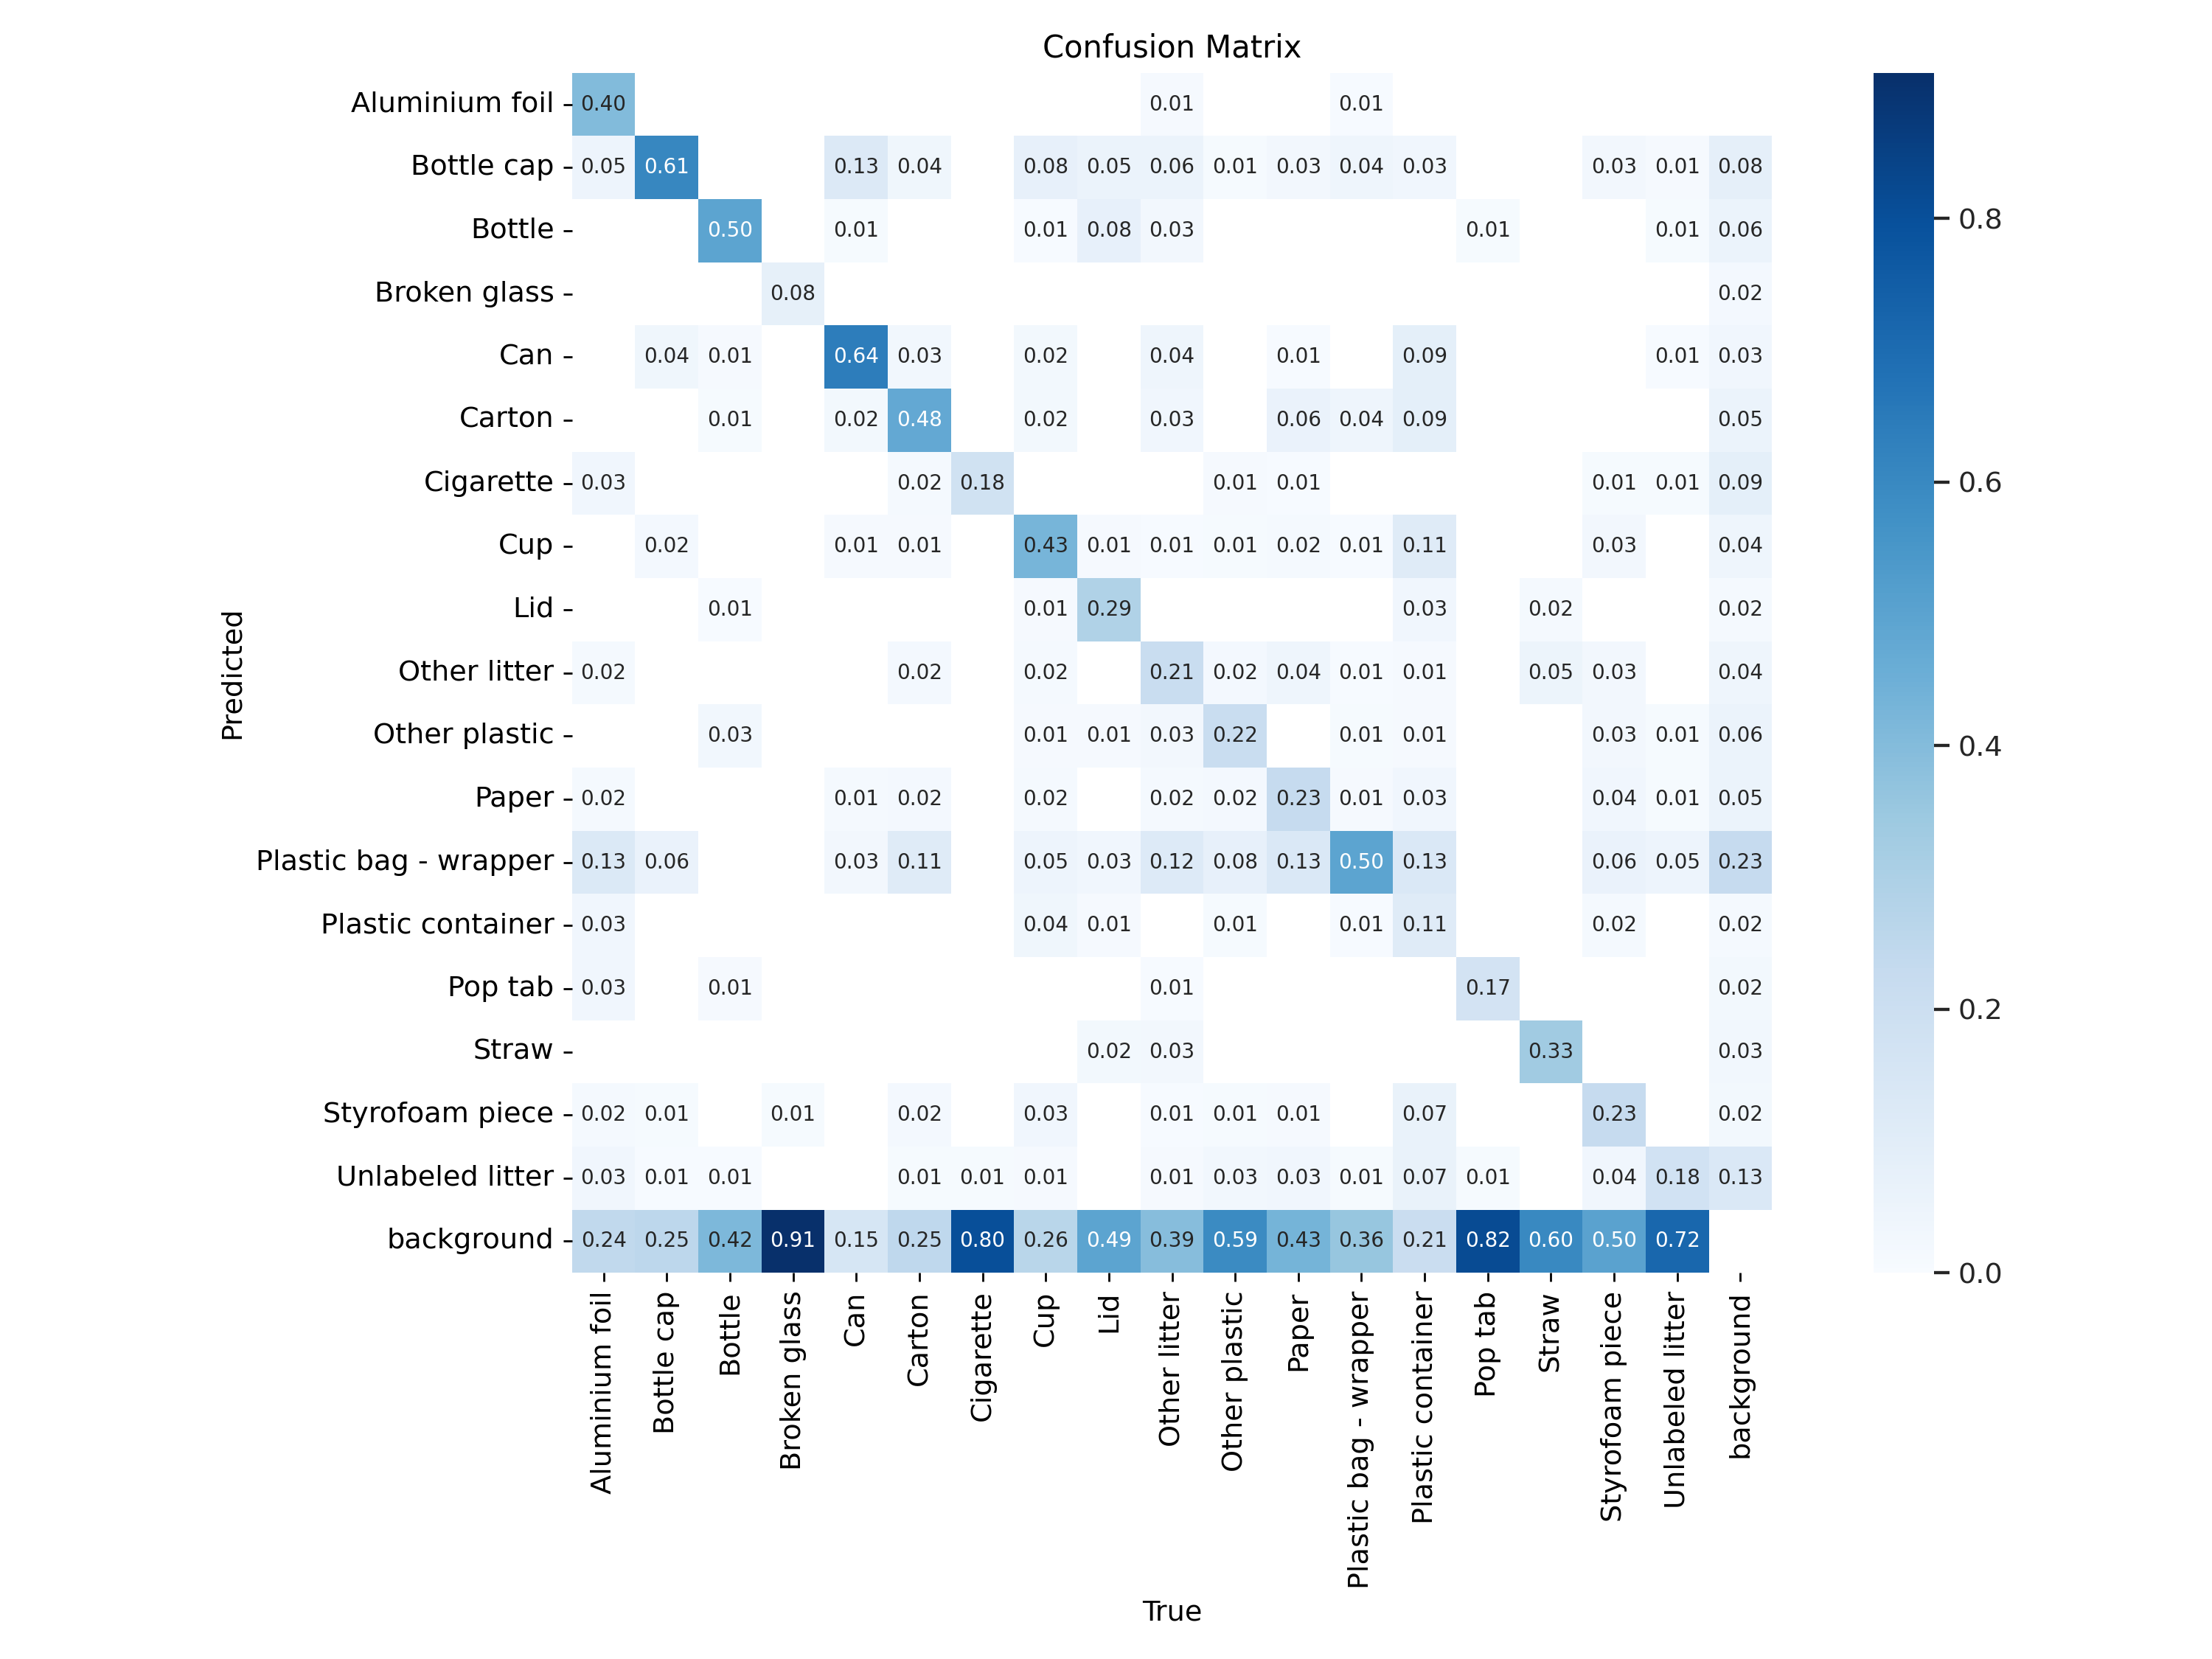

In [18]:
from IPython.display import Image, display
display(Image(filename='runs/val/yolov5_conf_matrix2/confusion_matrix.png', width=800))
